In [1]:
import os

from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

from src.utils import time_year_plus_frac
from src.tseries_mod import cache_dir_default

[9.70925489e+01 1.25538098e-03]


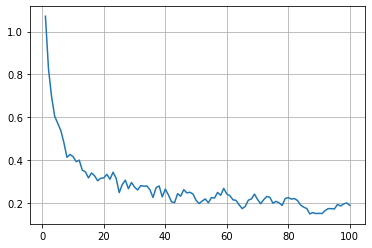

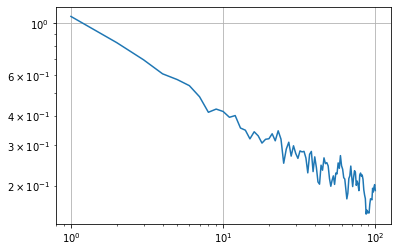

In [2]:
varname = 'GPP'
component = 'lnd'
expr = 'esm-piControl'
ds = xr.open_dataset(os.path.join(cache_dir_default, f'{varname}_{component}_{expr}_00_ann.nc'))
t = time_year_plus_frac(ds, 'time')
t -= t.mean()
y = ds[varname].isel(region=0)
pf = P.polyfit(t, y, 1)
print(pf)
y_anom = y - P.polyval(t, pf)

max_n = 100

std_anom = np.zeros(max_n)
ylen = len(y)
for n in range(1,max_n+1):
    resample_len = ylen // n
    std_anom[n-1] = y_anom.values[0:n*resample_len].reshape((resample_len, n)).mean(axis=1).std()
fig, ax = plt.subplots()
ax.plot(range(1,max_n+1), std_anom)
ax.grid(True)
fig, ax = plt.subplots()
ax.loglog(range(1,max_n+1), std_anom)
ax.grid(True)